# <b><span style='color:#F1A424'>AutoCluster - Mall Customer Data</span> </b>

### Disclaimer
The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.

## <b> Problem overview:</b>
    

**Dataset used - Mall Customer Dataset**

**Features**:

- `CustomerID`: customer_id .
- `Gender`: Gender of customer.
- `Age`: Age of customer.
- `Annual_Income`: Annual Income of Customer in k$.
- `Spending_Score`: Score assigned by mall based on customer behaviour and spending(1-100).

**Target Variable**:

- No target variable for clustering.

        
**Objective**:

The primary objective is typically to build a model that can accurately segregate the dataset into clusters.

**Usecase**:

Here, we will use AutoCluster(Automated Machine Learning for Clustering) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
from teradataml import AutoML, AutoCluster

In [2]:
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit
from teradataml import copy_to_sql

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
con = create_context(host='10.27.165.187', username='alice', password='alice')

In [4]:
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

## <b><span style='color:#F1A424'>| Dataset Creation </b>

In [15]:
create_table = """CREATE MULTISET TABLE Mall_customer_data,
    FALLBACK,
    NO BEFORE JOURNAL,
    NO AFTER JOURNAL,
    CHECKSUM = DEFAULT,
    DEFAULT MERGEBLOCKRATIO,
    MAP = TD_MAP1
(
    Gender          VARCHAR(1024) CHARACTER SET UNICODE NOT CASESPECIFIC,
    Age             BIGINT,
    Annual_Income   BIGINT,
    Spending_Score  BIGINT
)
NO PRIMARY INDEX;"""

In [16]:
execute_sql(create_table)

TeradataCursor uRowsHandle=70 bClosed=False

In [19]:
inserts="""INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 19, 15, 39);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 21, 15, 81);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 20, 16, 6);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 23, 16, 77);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 31, 17, 40);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 22, 17, 76);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 35, 18, 6);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 23, 18, 94);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 64, 19, 3);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 30, 19, 72);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 67, 19, 14);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 35, 19, 99);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 58, 20, 15);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 24, 20, 77);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 37, 20, 13);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 22, 20, 79);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 35, 21, 35);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 20, 21, 66);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 52, 23, 29);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 35, 23, 98);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 35, 24, 35);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 25, 24, 73);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 46, 25, 5);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 31, 25, 73);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 54, 28, 14);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 29, 28, 82);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 45, 28, 32);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 35, 28, 61);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 40, 29, 31);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 23, 29, 87);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 60, 30, 4);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 21, 30, 73);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 53, 33, 4);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 18, 33, 92);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 49, 33, 14);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 21, 33, 81);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 42, 34, 17);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 30, 34, 73);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 36, 37, 26);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 20, 37, 75);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 65, 38, 35);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 24, 38, 92);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 48, 39, 36);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 31, 39, 61);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 49, 39, 28);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 24, 39, 65);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 50, 40, 55);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 27, 40, 47);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 29, 40, 42);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 31, 40, 42);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 49, 42, 52);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 33, 42, 60);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 31, 43, 54);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 59, 43, 60);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 50, 43, 45);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 47, 43, 41);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 51, 44, 50);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 69, 44, 46);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 27, 46, 51);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 53, 46, 46);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 70, 46, 56);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 19, 46, 55);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 67, 47, 52);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 54, 47, 59);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 63, 48, 51);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 18, 48, 59);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 43, 48, 50);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 68, 48, 48);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 19, 48, 59);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 32, 48, 47);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 70, 49, 55);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 47, 49, 42);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 60, 50, 49);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 60, 50, 56);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 59, 54, 47);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 26, 54, 54);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 45, 54, 53);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 40, 54, 48);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 23, 54, 52);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 49, 54, 42);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 57, 54, 51);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 38, 54, 55);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 67, 54, 41);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 46, 54, 44);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 21, 54, 57);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 48, 54, 46);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 55, 57, 58);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 22, 57, 55);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 34, 58, 60);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 50, 58, 46);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 68, 59, 55);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 18, 59, 41);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 48, 60, 49);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 40, 60, 40);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 32, 60, 42);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 24, 60, 52);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 47, 60, 47);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 27, 60, 50);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 48, 61, 42);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 20, 61, 49);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 23, 62, 41);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 49, 62, 48);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 67, 62, 59);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 26, 62, 55);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 49, 62, 56);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 21, 62, 42);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 66, 63, 50);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 54, 63, 46);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 68, 63, 43);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 66, 63, 48);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 65, 63, 52);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 19, 63, 54);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 38, 64, 42);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 19, 64, 46);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 18, 65, 48);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 19, 65, 50);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 63, 65, 43);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 49, 65, 59);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 51, 67, 43);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 50, 67, 57);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 27, 67, 56);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 38, 67, 40);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 40, 69, 58);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 39, 69, 91);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 23, 70, 29);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 31, 70, 77);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 43, 71, 35);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 40, 71, 95);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 59, 71, 11);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 38, 71, 75);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 47, 71, 9);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 39, 71, 75);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 25, 72, 34);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 31, 72, 71);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 20, 73, 5);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 29, 73, 88);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 44, 73, 7);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 32, 73, 73);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 19, 74, 10);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 35, 74, 72);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 57, 75, 5);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 32, 75, 93);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 28, 76, 40);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 32, 76, 87);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 25, 77, 12);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 28, 77, 97);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 48, 77, 36);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 32, 77, 74);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 34, 78, 22);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 34, 78, 90);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 43, 78, 17);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 39, 78, 88);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 44, 78, 20);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 38, 78, 76);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 47, 78, 16);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 27, 78, 89);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 37, 78, 1);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 30, 78, 78);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 34, 78, 1);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 30, 78, 73);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 56, 79, 35);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 29, 79, 83);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 19, 81, 5);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 31, 81, 93);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 50, 85, 26);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 36, 85, 75);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 42, 86, 20);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 33, 86, 95);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 36, 87, 27);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 32, 87, 63);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 40, 87, 13);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 28, 87, 75);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 36, 87, 10);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 36, 87, 92);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 52, 88, 13);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 30, 88, 86);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 58, 88, 15);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 27, 88, 69);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 59, 93, 14);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 35, 93, 90);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 37, 97, 32);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 32, 97, 86);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 46, 98, 15);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 29, 98, 88);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 41, 99, 39);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 30, 99, 97);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 54, 101, 24);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 28, 101, 68);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 41, 103, 17);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 36, 103, 85);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 34, 103, 23);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 32, 103, 69);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 33, 113, 8);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 38, 113, 91);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 47, 120, 16);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 35, 120, 79);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 45, 126, 28);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 32, 126, 74);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 32, 137, 18);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 30, 137, 83);"""

In [20]:
execute_sql(inserts)

TeradataCursor uRowsHandle=87 bClosed=False

## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [21]:
cluster_df = DataFrame("Mall_customer_data")

In [22]:
cluster_df

Gender,Age,Annual_Income,Spending_Score
Female,20,16,6
Female,31,17,40
Female,22,17,76
Female,35,18,6
Male,64,19,3
Female,30,19,72
Female,23,18,94
Female,23,16,77
Male,21,15,81
Male,19,15,39


In [12]:
cluster_df.shape

(200, 4)

In [13]:
cluster_df.head()

Gender,Age,Annual_Income,Spending_Score
Female,23,18,94
Female,58,20,15
Female,24,20,77
Female,35,21,35
Female,46,25,5
Female,54,28,14
Female,35,23,98
Female,30,19,72
Female,35,18,6
Female,31,17,40


In [14]:
cluster_df_sample = cluster_df.sample(frac = [0.8, 0.2])

In [15]:
cluster_df_sample.head()

Gender,Age,Annual_Income,Spending_Score,sampleid
Female,24,20,77,1
Female,46,25,5,1
Female,54,28,14,1
Female,45,28,32,1
Female,21,30,73,2
Female,49,33,14,2
Female,23,29,87,1
Female,35,21,35,2
Female,58,20,15,1
Female,23,18,94,1


In [16]:
cluster_df_train= cluster_df_sample[cluster_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
cluster_df_test = cluster_df_sample[cluster_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [17]:
cluster_df_test.shape

(40, 4)

In [18]:
cluster_df_train.shape

(160, 4)

In [19]:
cluster_df_train.head()

Gender,Age,Annual_Income,Spending_Score
Female,35,23,98
Female,45,28,32
Female,23,29,87
Female,21,33,81
Female,30,34,73
Female,36,37,26
Female,42,34,17
Female,46,25,5
Female,24,20,77
Female,30,19,72


In [20]:
cluster_df_test.head()

Gender,Age,Annual_Income,Spending_Score
Female,31,43,54
Female,23,54,52
Female,50,58,46
Female,49,62,48
Female,23,70,29
Female,57,75,5
Female,50,67,57
Female,27,46,51
Female,24,39,65
Female,21,30,73


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

OR

In [21]:
cl = AutoCluster(verbose=2,
                 max_runtime_secs=300)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 160
Total Columns in the data: 4

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
Spending_Score,BIGINT,160,0,None,0,160,0,0.0,100.0
Gender,VARCHAR(1024) CHARACTER SET UNICODE,160,0,0,None,None,None,0.0,100.0
Annual_Income,BIGINT,160,0,None,0,160,0,0.0,100.0
Age,BIGINT,160,0,None,0,160,0,0.0,100.0



Statistics of Data:


ATTRIBUTE,StatName,StatValue
Annual_Income,MAXIMUM,137.0
Annual_Income,STANDARD DEVIATION,26.735132234524
Annual_Income,PERCENTILES(25),40.0
Annual_Income,PERCENTILES(50),60.5
Age,COUNT,160.0
Age,MINIMUM,18.0
Age,MAXIMUM,70.0
Age,MEAN,39.43125
Age,STANDARD DEVIATION,14.066160774383944
Age,PERCENTILES(25),29.0



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
Gender                    2         

No Futile columns found.
Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
      ColumnName  OutlierPercentage
0  Annual_Income              0.625


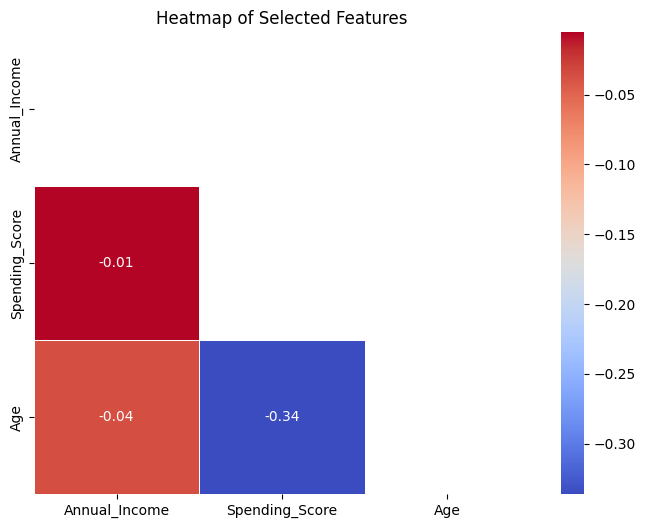


Number of features selected for Boxplots: 3

Selection Criteria: Top 2 Correlated Feature Pairs (Fallback)

Selected Features: Annual_Income, Spending_Score, Age

Boxplots:


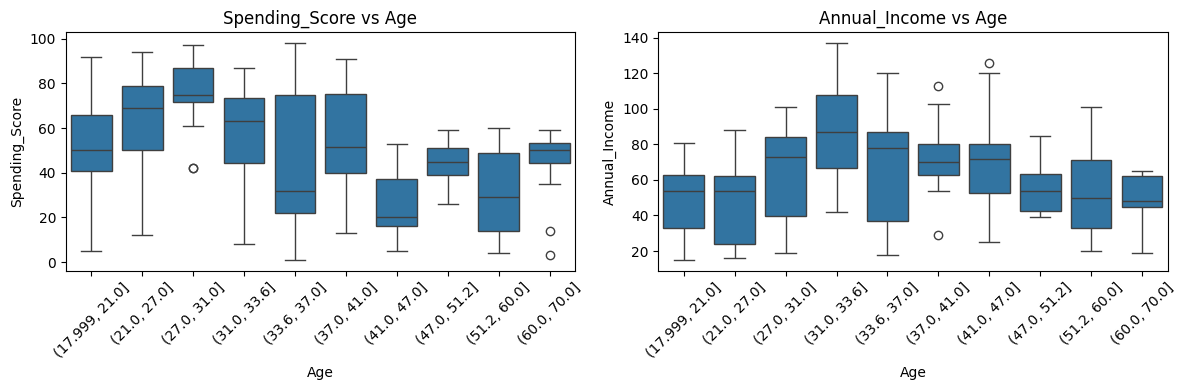


Categorical Feature Distributions by Target Column (Count Plots):


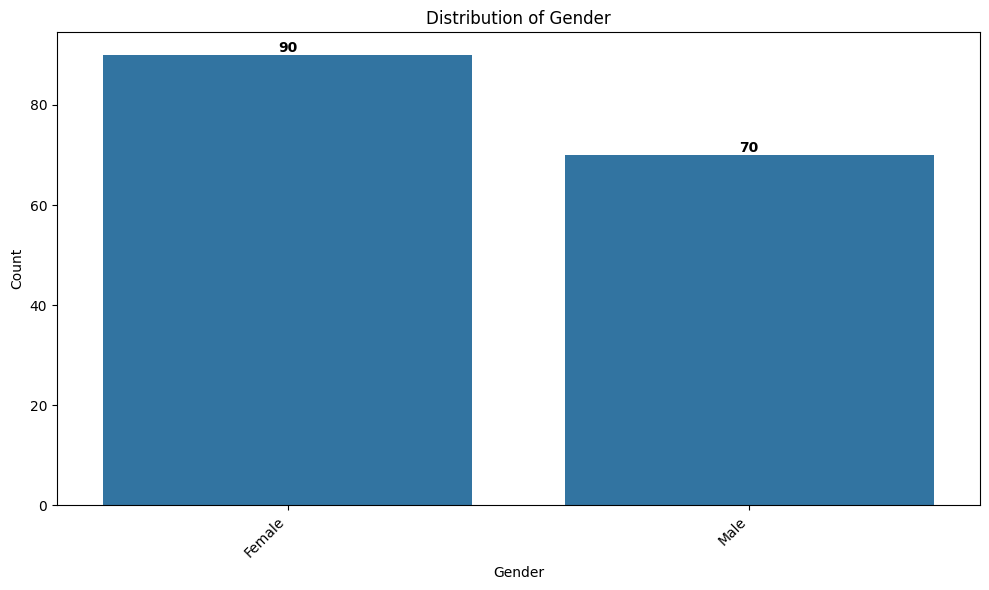


Scatter Plots for Top Correlated Feature Pairs:


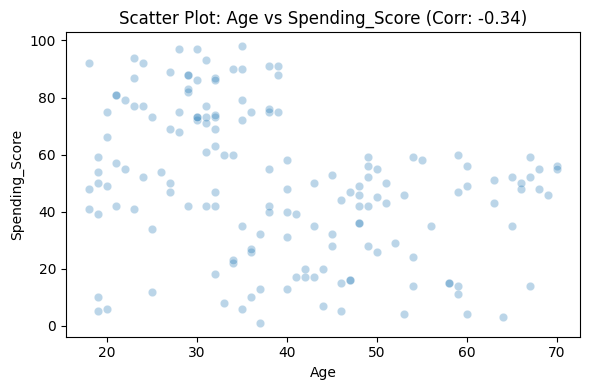

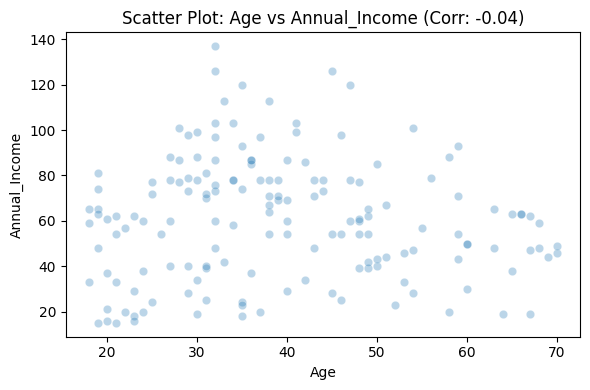

Analysis completed. No action taken.                                                    


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


['Gender']


Gender_0,Gender_1,Age,Annual_Income,Spending_Score,id
0,1,19,15,39,25
0,1,59,54,47,37
0,1,64,19,3,41
0,1,39,69,91,45
0,1,59,93,14,53
0,1,28,77,97,57
1,0,60,50,49,12
1,0,30,34,73,20
1,0,50,43,45,24
1,0,29,40,42,28


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
      ColumnName  OutlierPercentage
0  Annual_Income              0.625


['Annual_Income']


Gender_0,Gender_1,Age,Annual_Income,Spending_Score,id
0,1,64,19,3,41
0,1,59,93,14,53
0,1,28,77,97,57
0,1,69,44,46,61
0,1,30,99,97,73
0,1,39,71,75,77
1,0,50,43,45,24
1,0,42,34,17,36
1,0,35,74,72,40
1,0,23,16,77,44


['Age', 'Annual_Income', 'Spending_Score']


id,Gender_1,Gender_0,Age,Annual_Income,Spending_Score
40,0,1,-0.31601820698443006,0.5290123786129584,0.8734548885692565
52,0,1,0.11187668540633575,1.6462711117782411,-1.2717873719413373
56,0,1,-1.3144396225628836,-0.24151088563896078,0.28838881752091267
60,0,1,2.0374037011647816,-0.47266786491453655,-0.06265082510809358
72,0,1,0.3971399470001796,-1.2431911291664557,-0.6867213008929935
76,0,1,0.6824032085940235,0.18227690969959473,0.36639762699402517
25,1,0,-1.4570712533598056,-1.7440312509302032,-0.41369046773709983
37,1,0,1.3955613625786332,-0.24151088563896078,-0.10165522984464984
41,1,0,1.752140439570938,-1.5899265980798192,-1.817849038253125
45,1,0,-0.03075494539058619,0.33638156254997853,1.614538578563825


['Age', 'Annual_Income', 'Spending_Score']


id,Gender_1,Gender_0,Age,Annual_Income,Spending_Score
40,0,1,-0.31601820698443006,0.5290123786129584,0.8734548885692565
52,0,1,0.11187668540633575,1.6462711117782411,-1.2717873719413373
56,0,1,-1.3144396225628836,-0.24151088563896078,0.28838881752091267
60,0,1,2.0374037011647816,-0.47266786491453655,-0.06265082510809358
72,0,1,0.3971399470001796,-1.2431911291664557,-0.6867213008929935
76,0,1,0.6824032085940235,0.18227690969959473,0.36639762699402517
25,1,0,-1.4570712533598056,-1.7440312509302032,-0.41369046773709983
37,1,0,1.3955613625786332,-0.24151088563896078,-0.10165522984464984
41,1,0,1.752140439570938,-1.5899265980798192,-1.817849038253125
45,1,0,-0.03075494539058619,0.33638156254997853,1.614538578563825


['col_0', 'col_1', 'col_2', 'col_3']


Model: KMeans                                                                                                                                         
name: KMeans
Hyperparameter Grid:
  n_clusters: (2, 3, 4, 5, 6, 7, 8, 9, 10)
  init: ('k-means++', 'random')
  n_init: (5, 10)
  max_iter: (100, 200)
  tol: (0.001, 0.01)
  algorithm: ('auto', 'full')
Total number of models for KMeans: 288
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Model: GaussianMixture
name: GaussianMixture
Hyperparameter Grid:
  n_components: (2, 3, 4, 5, 6, 7, 8, 9, 10)
  covariance_type: ('full', 'tied', 'diag', 'spherical')
  max_iter: (100, 300)
Total number of models for GaussianMixture: 72
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

,RANK,MODEL_ID,FEATURE_SELECTION,SILHOUETTE,CALINSKI,DAVIES
0,1,KMEANS_2,pca,0.608256,428.551564,0.517300
1,2,KMEANS_0,pca,0.608256,428.551564,0.517300
2,3,KMEANS_1,non_pca,0.608256,428.551564,0.517300
3,4,KMEANS_3,non_pca,0.608256,428.551564,0.517300
4,5,GAUSSIANMIXTURE_2,pca,0.574122,373.810601,0.543395
5,6,GAUSSIANMIXTURE_1,non_pca,0.574122,373.810601,0.543395
6,7,GAUSSIANMIXTURE_0,pca,0.568027,367.416884,0.548419
7,8,GAUSSIANMIXTURE_3,non_pca,0.568027,367.416884,0.548419


In [45]:
cl.fit(cluster_df_train)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [46]:
cl.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,SILHOUETTE,CALINSKI,DAVIES
0,1,KMEANS_2,pca,0.608256,428.551564,0.517300
1,2,KMEANS_0,pca,0.608256,428.551564,0.517300
2,3,KMEANS_1,non_pca,0.608256,428.551564,0.517300
3,4,KMEANS_3,non_pca,0.608256,428.551564,0.517300
4,5,GAUSSIANMIXTURE_2,pca,0.574122,373.810601,0.543395
5,6,GAUSSIANMIXTURE_1,non_pca,0.574122,373.810601,0.543395
6,7,GAUSSIANMIXTURE_0,pca,0.568027,367.416884,0.548419
7,8,GAUSSIANMIXTURE_3,non_pca,0.568027,367.416884,0.548419


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [48]:
cl.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,SILHOUETTE,CALINSKI,DAVIES
0,1,KMEANS_2,pca,0.608256,428.551564,0.5173


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [49]:
cl.model_hyperparameters(rank=3)

{'n_clusters': 2,
 'init': 'k-means++',
 'n_init': 5,
 'max_iter': 100,
 'tol': 0.001,
 'algorithm': 'auto'}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction : </b>

Data Transformation started for clustering ...


Gender_0,Gender_1,Age,Annual_Income,Spending_Score,id
1,0,31,43,54,24
1,0,23,54,52,36
1,0,50,58,46,40
1,0,49,62,48,44
1,0,23,70,29,52
1,0,57,75,5,56
0,1,19,46,55,13
0,1,57,54,51,21
0,1,67,54,41,25
0,1,26,62,55,29


id,Gender_1,Gender_0,Age,Annual_Income,Spending_Score
24,0,1,-0.6012814685782739,-0.6652986809775163,0.1713756033112439
36,0,1,-1.1718079917659616,-0.24151088563896078,0.09336679383813141
40,0,1,0.7537190239924845,-0.08740623278857697,-0.1406596345812061
44,0,1,0.6824032085940235,0.06669842006180686,-0.06265082510809358
52,0,1,-1.1718079917659616,0.37490772576257453,-0.8037345151026624
56,0,1,1.2529297317817112,0.5675385418255543,-1.7398402287800123
13,1,0,-1.4570712533598056,-0.5497201913397285,0.21038000804780016
21,1,0,1.2529297317817112,-0.24151088563896078,0.05436238910157516
25,1,0,1.9660878857663209,-0.24151088563896078,-0.3356816582639873
29,1,0,-0.9578605455705788,0.06669842006180686,0.21038000804780016


,id,col_0,col_1,col_2,col_3
0,12,-1.503038,-1.303719,0.300711,-0.503775
1,13,-1.062950,-0.629472,0.909805,0.865147
2,20,-1.165329,-0.923333,0.362049,-0.533116
3,21,0.922597,-0.175172,-0.907035,0.747894
4,24,-0.527489,-0.711318,0.307608,-0.580951
5,25,1.697443,-0.108977,-1.137480,0.694460
6,28,-0.656340,-0.601290,0.589930,-0.577558
7,29,-0.768400,0.009154,0.543538,0.844430
8,36,-0.912261,-0.311721,0.758363,-0.564347
9,37,1.661180,0.233676,-1.250033,0.696122


id,Gender_1,Gender_0,Age,Annual_Income,Spending_Score
24,0,1,-0.6012814685782739,-0.6652986809775163,0.1713756033112439
36,0,1,-1.1718079917659616,-0.24151088563896078,0.09336679383813141
40,0,1,0.7537190239924845,-0.08740623278857697,-0.1406596345812061
44,0,1,0.6824032085940235,0.06669842006180686,-0.06265082510809358
52,0,1,-1.1718079917659616,0.37490772576257453,-0.8037345151026624
56,0,1,1.2529297317817112,0.5675385418255543,-1.7398402287800123
13,1,0,-1.4570712533598056,-0.5497201913397285,0.21038000804780016
21,1,0,1.2529297317817112,-0.24151088563896078,0.05436238910157516
25,1,0,1.9660878857663209,-0.24151088563896078,-0.3356816582639873
29,1,0,-0.9578605455705788,0.06669842006180686,0.21038000804780016


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 9/9            

Following model is being picked for evaluation of clustering:
Model ID : KMEANS_2 
Feature Selection Method : pca

Visualizing Clusters for interpretability...
   id     col_0     col_1     col_2     col_3
0  12 -1.503038 -1.303719  0.300711 -0.503775
1  13 -1.062950 -0.629472  0.909805  0.865147
2  20 -1.165329 -0.923333  0.362049 -0.533116
3  21  0.922597 -0.175172 -0.907035  0.747894
4  24 -0.527489 -0.711318  0.307608 -0.580951
Selection Criteria: Top 2 High Variance Features
Selected Features: col_0, col_1


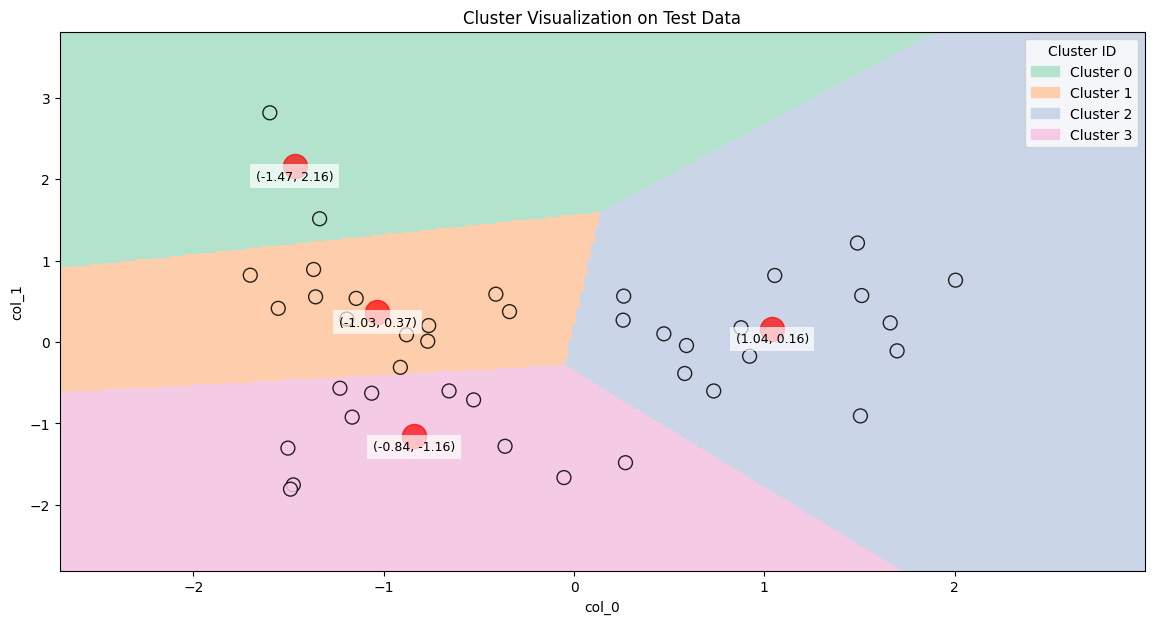


 Cluster Assignment:
   id  cluster_assignment
0  37                   1
1  44                   1
2  45                   1
3  48                   1
4  53                   1
5  56                   1
6  52                   1
7  40                   1
8  36                   1
9  25                   1


In [47]:
prediction = cl.predict(cluster_df_test, rank=1)

In [50]:
prediction.head()

id,cluster_assignment
8,1
12,1
13,1
16,1
20,1
21,1
17,1
9,1
5,1
4,1



Skipping data transformation as data is already transformed.

Following model is being picked for evaluation of clustering:
Model ID : GAUSSIANMIXTURE_2 
Feature Selection Method : pca

Visualizing Clusters for interpretability...
   id     col_0     col_1     col_2     col_3
0  12 -1.503038 -1.303719  0.300711 -0.503775
1  13 -1.062950 -0.629472  0.909805  0.865147
2  20 -1.165329 -0.923333  0.362049 -0.533116
3  21  0.922597 -0.175172 -0.907035  0.747894
4  24 -0.527489 -0.711318  0.307608 -0.580951
Selection Criteria: Top 2 High Variance Features
Selected Features: col_0, col_1


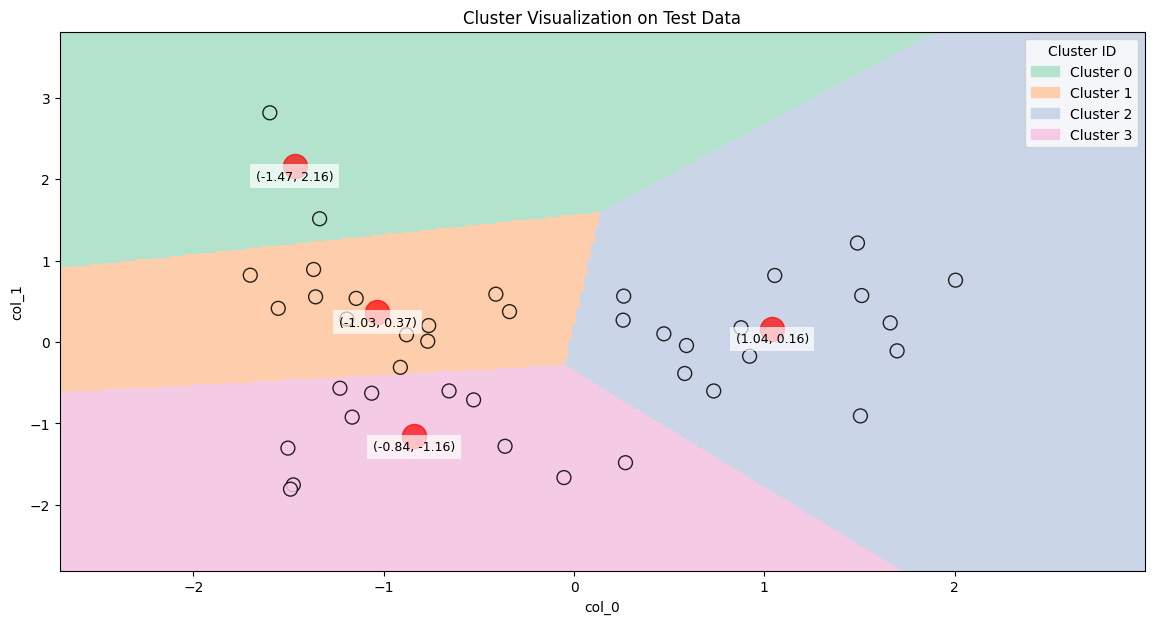


 Cluster Assignment:
   id  cluster_assignment
0  37                   1
1  44                   1
2  45                   1
3  48                   1
4  53                   1
5  56                   1
6  52                   1
7  40                   1
8  36                   1
9  25                   1


In [51]:
prediction_2 = cl.predict(cluster_df_test, rank=5)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation of clustering:
Model ID : KMEANS_1 
Feature Selection Method : non_pca

Visualizing Clusters for interpretability...
   id  Gender_1  Gender_0       Age  Annual_Income  Spending_Score
0  12         0         1 -1.314440      -1.166139        0.912459
1  13         1         0 -1.457071      -0.549720        0.210380
2  20         0         1 -1.100492      -0.819403        0.600424
3  21         1         0  1.252930      -0.241511        0.054362
4  24         0         1 -0.601281      -0.665299        0.171376
Selection Criteria: Top 2 High Variance Features
Selected Features: Spending_Score, Age


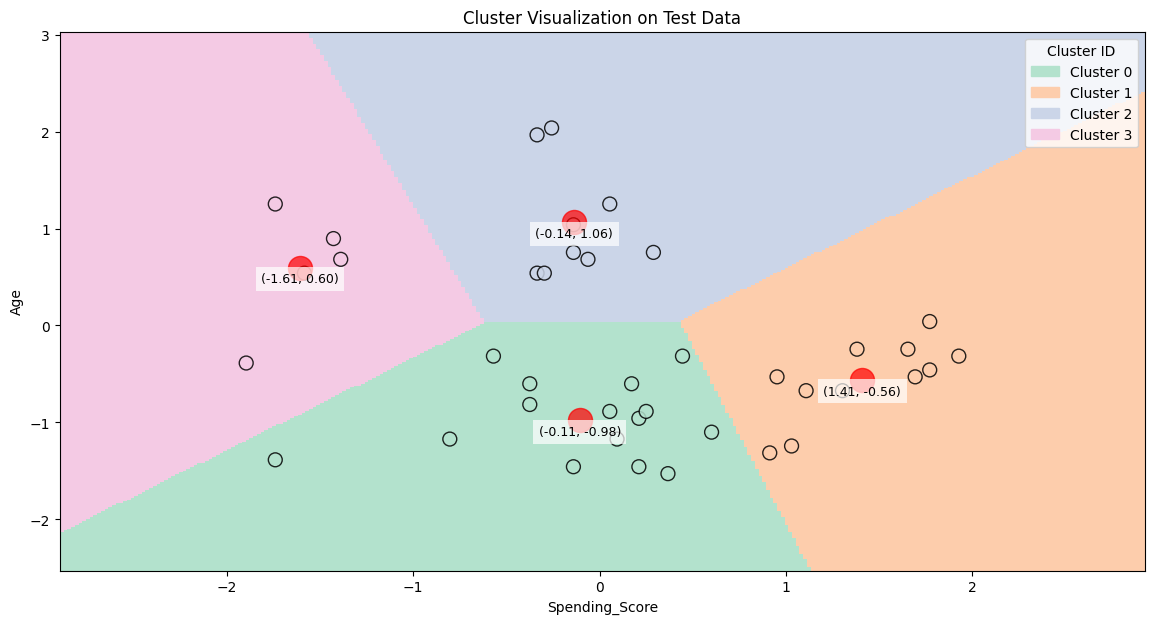


 Cluster Assignment:
   id  cluster_assignment
0  56                   0
1  72                   0
2  76                   0
3  80                   0
4  64                   0
5  32                   0
6  88                   0
7  60                   0
8  52                   0
9  40                   0


In [52]:
prediction_3 = cl.predict(cluster_df_test, rank=3)

Data Transformation started for clustering ...


Gender_0,Gender_1,Age,Annual_Income,Spending_Score,id
1,0,35,23,98,24
1,0,45,28,32,36
1,0,23,29,87,40
1,0,21,33,81,44
1,0,30,34,73,52
1,0,36,37,26,56
0,1,22,20,79,13
0,1,35,24,35,21
0,1,25,24,73,25
0,1,31,25,73,29


id,Gender_1,Gender_0,Age,Annual_Income,Spending_Score
24,0,1,-0.31601820698443006,-1.4358219452294354,1.887569411719719
36,0,1,0.3971399470001796,-1.2431911291664557,-0.6867213008929935
40,0,1,-1.1718079917659616,-1.2046649659538597,1.4585209596176
44,0,1,-1.3144396225628836,-1.050560313103476,1.2244945311982627
52,0,1,-0.6725972839767349,-1.01203414989088,0.9124592933058127
56,0,1,-0.2447023915859691,-0.8964556602530921,-0.9207477293123311
13,1,0,-1.2431238071644226,-1.5514004348672232,1.14648572172515
21,1,0,-0.31601820698443006,-1.3972957820168395,-0.5697080866833248
25,1,0,-1.0291763609690396,-1.3972957820168395,0.9124592933058127
29,1,0,-0.6012814685782739,-1.3587696188042435,0.9124592933058127


,id,col_0,col_1,col_2,col_3
0,12,-0.986031,-1.690573,-0.118093,-0.530801
1,13,-1.478280,-1.689583,0.118511,0.919453
2,20,-1.427077,-1.688870,0.046892,-0.501348
3,21,0.363602,-1.355179,0.668235,0.770991
4,24,-1.461298,-1.598963,-1.088854,-0.479066
5,25,-1.177754,-1.507108,0.128751,0.895532
6,28,1.628785,-1.198358,0.910887,-0.746220
7,29,-0.880612,-1.447404,-0.175280,0.878640
8,36,0.829001,-1.169513,0.216659,-0.675054
9,37,2.443890,-0.941173,0.252429,0.621760


id,Gender_1,Gender_0,Age,Annual_Income,Spending_Score
24,0,1,-0.31601820698443006,-1.4358219452294354,1.887569411719719
36,0,1,0.3971399470001796,-1.2431911291664557,-0.6867213008929935
40,0,1,-1.1718079917659616,-1.2046649659538597,1.4585209596176
44,0,1,-1.3144396225628836,-1.050560313103476,1.2244945311982627
52,0,1,-0.6725972839767349,-1.01203414989088,0.9124592933058127
56,0,1,-0.2447023915859691,-0.8964556602530921,-0.9207477293123311
13,1,0,-1.2431238071644226,-1.5514004348672232,1.14648572172515
21,1,0,-0.31601820698443006,-1.3972957820168395,-0.5697080866833248
25,1,0,-1.0291763609690396,-1.3972957820168395,0.9124592933058127
29,1,0,-0.6012814685782739,-1.3587696188042435,0.9124592933058127


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 9/9            

Following model is being picked for evaluation of clustering:
Model ID : GAUSSIANMIXTURE_1 
Feature Selection Method : non_pca

Visualizing Clusters for interpretability...
   id  Gender_1  Gender_0       Age  Annual_Income  Spending_Score
0  12         0         1 -0.672597      -1.589927        0.873455
1  13         1         0 -1.243124      -1.551400        1.146486
2  20         0         1 -1.100492      -1.551400        1.068477
3  21         1         0 -0.316018      -1.397296       -0.569708
4  24         0         1 -0.316018      -1.435822        1.887569
Selection Criteria: Top 2 High Variance Features
Selected Features: Annual_Income, Age


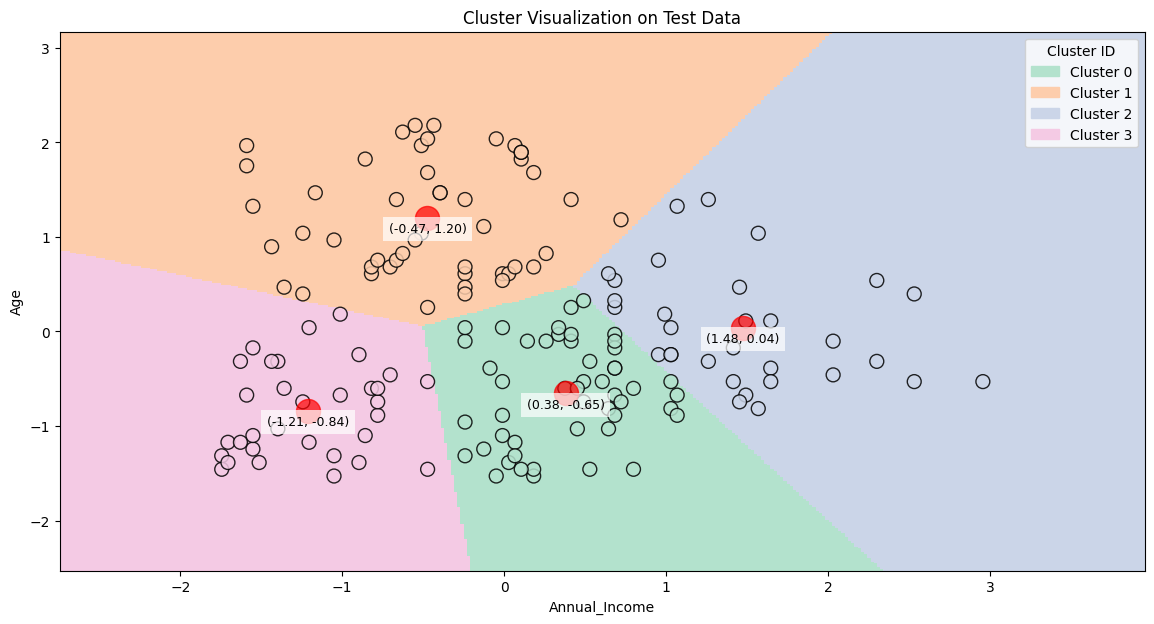


 Cluster Assignment:
   id  cluster_assignment
0  57                   0
1  73                   0
2  77                   0
3  81                   0
4  93                   0
5  97                   0
6  89                   0
7  61                   0
8  53                   0
9  41                   0


In [53]:
prediction_4 = cl.predict(cluster_df_train, rank=6)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation of clustering:
Model ID : KMEANS_2 
Feature Selection Method : pca

Visualizing Clusters for interpretability...
   id     col_0     col_1     col_2     col_3
0  12 -0.986031 -1.690573 -0.118093 -0.530801
1  13 -1.478280 -1.689583  0.118511  0.919453
2  20 -1.427077 -1.688870  0.046892 -0.501348
3  21  0.363602 -1.355179  0.668235  0.770991
4  24 -1.461298 -1.598963 -1.088854 -0.479066
Selection Criteria: Top 2 High Variance Features
Selected Features: col_0, col_1


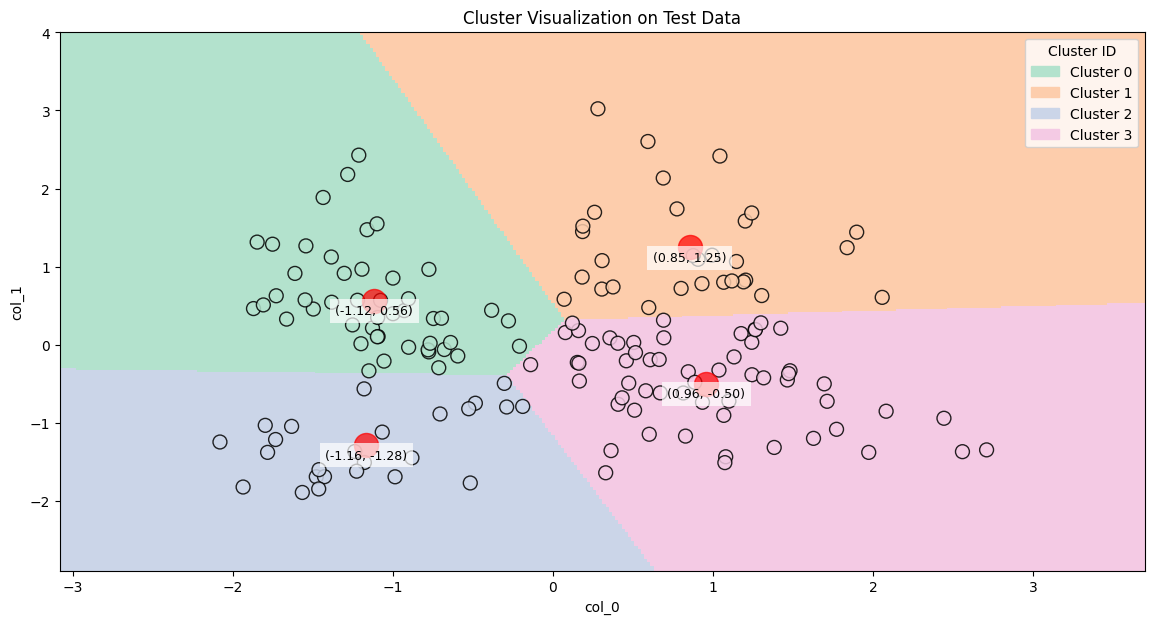


 Cluster Assignment:
   id  cluster_assignment
0  37                   1
1  44                   1
2  45                   1
3  48                   1
4  53                   1
5  56                   1
6  52                   1
7  40                   1
8  36                   1
9  25                   1


In [54]:
prediction_5 = cl.predict(cluster_df_train, rank=1)

In [55]:
remove_context()

True